## TRABALHO ORIENTADO

MACHINE LEARNING - Hugo de Paula

**Integrantes:**

1.   Ana Gabriella Amorim Abreu Pereira
2.   Igor Quaresma Castro
3.   Igor Ribeiro Barboza
4.   Isabella Ferreira de Oliveira

### Objetivo do Trabalho

A proposta deste trabalho é aplicar técnicas de aprendizado de máquina e extrair conhecimento de bases de dados quaisquer para identificar padrões interessantes que possam ser úteis para o apoio à tomada de decisão de algum problema social ou empresarial. O processo de Data Science é iterativo, o que pressupõe o retorno a etapas anteriores do processo para ajustes caso necessário.

### Base de dados utilizada

A base de dados escolhida para desenvolver a atividade foi a [Marketing Campaign](https://www.kaggle.com/rodsaldanha/arketing-campaign) que está disponível no kaggle. Trata-se de uma base que possui dados da personalidade dos clientes de uma determinada empresa. Por meio dessa base, é possível realizar uma análise detalhada dos clientes, ajudando a empresa na tomada de decisões e facilitando a criação de campanhas de marketing de acordo com as necessidades, comportamentos e preocupações específicos de diferentes tipos de clientes.

### Objetivo principal do trabalho

O objetivo principal é treinar um modelo preditivo que permita à empresa maximizar o lucro da próxima campanha de marketing. Para isso, foi analisado os dados das colunas `Year_Birth`, `Education`, `Marital_Status`, `Income`, `Kidhome`, `Teenhome`, `Date_Customer`, `Month_Customer`, `Year_Customer`, `Recency`, `MntWines`, `MntFruits`, `MntMeatProducts`,       `MntFishProducts`, `MntSweetProducts`, `MntGoldProds`, `NumDealsPurchases`, `NumWebPurchases`,`NumCatalogPurchases`,`NumStorePurchases`,`NumWebVisitsMonth`. A coluna que será utilizada para previsão é a `AcceptedAnyCmp` que indica que o cliente aceitou qualquer uma das campanhas.

## Inicialização da plataforma

A célula a seguir inicializa a plataforma, carregando as bibliotecas que serão relevantes para o trabalho em seguida.

In [ ]:
!pip install pydotplus
!pip install dtreeviz

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from dtreeviz.trees import *
import pydotplus
from IPython.display import Image
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction import DictVectorizer
from sklearn import preprocessing
from sklearn import tree
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

np.set_printoptions(threshold=None, precision=2)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('precision', 2)

### Descrição dos atributos:

* **ID**: identificador único do cliente
* **Year_Birth**: ano de nascimento do cliente
* **Education**: nível de educação do cliente
* **Marital_Status**: estado civil do cliente
* **Income**: renda familiar anual do cliente
* **Kidhome**: número de crianças na casa do cliente
* **Teenhome**: número de adolescentes na casa do cliente
* **Dt_Customer**: data de inscrição do cliente na empresa
* **Recency**: número de dias desde a última compra do cliente
* **MntWines**: quantia gasta em vinho nos últimos 2 anos
* **MntFruits**: quantia gasta em frutas nos últimos 2 anos
* **MntMeatProducts**: quantia gasta em carne nos últimos 2 anos
* **MntFishProducts**: quantia gasta em peixe nos últimos 2 anos
* **MntSweetProducts**: quantia gasta em doces nos últimos 2 anos
* **MntGoldProds**: quantia gasta em produtos gold nos últimos 2 anos
* **NumDealsPurchases**: número de compras feitas com desconto
* **NumWebPurchases**: número de compras feitas por meio do site da empresa
* **NumCatalogPurchases**: número de compras feitas usando um catálogo
* **NumStorePurchases**: número de compras feitas diretamente nas lojas
* **NumWebVisitsMonth**: número de visitas ao site da empresa no último mês
* **AcceptedCmp3**: 1 se o cliente aceitou a oferta na 3ª campanha, 0 caso contrário
* **AcceptedCmp4**: 1 se o cliente aceitou a oferta na 4ª campanha, 0 caso contrário
* **AcceptedCmp5**: 1 se o cliente aceitou a oferta na 5ª campanha, 0 caso contrário
* **AcceptedCmp1**: 1 se o cliente aceitou a oferta na 1ª campanha, 0 caso contrário
* **AcceptedCmp2**: 1 se o cliente aceitou a oferta na 2ª campanha, 0 caso contrário
* **Complain**: 1 se o cliente reclamar nos últimos 2 anos, 0 caso contrário
* **Z_CostContact**: 
* **Z_Revenue**: 
* **Response**: 1 se o cliente aceitou a oferta na última campanha, 0 caso contrário

## UPLOAD DE ARQUIVO LOCAL:

In [ ]:
mark_camp = pd.read_excel('https://github.com/00Zigor/Datasets-ML/raw/main/marketing_campaign_kaggle.xlsx')

print("\nDimensões da base de dados:\n{0}\n".format(mark_camp.shape))
print("\nCampos da base de dados:\n{0}\n".format(list(mark_camp.keys())))
print("\nTipos dos dados:\n{0}\n".format(mark_camp.info()))


Dimensões da base de dados:
(2240, 29)


Campos da base de dados:
['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              

In [ ]:
mark_camp.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


## ESTATÍSTICA DESCRITIVA DOS DADOS

In [ ]:
# Exibe apenas os campos numéricos:

print(mark_camp.describe())

# Para se ter uma visão dos atributos categóricos, os atributos não numéricos 
# são descartados. 

categ = mark_camp.dtypes[mark_camp.dtypes == "object"].index

print("\n", mark_camp[categ].describe(), sep='\n')

             ID  Year_Birth     Income  Kidhome  Teenhome  Recency  MntWines  \
count   2240.00     2240.00    2216.00  2240.00   2240.00  2240.00   2240.00   
mean    5592.16     1968.81   52247.25     0.44      0.51    49.11    303.94   
std     3246.66       11.98   25173.08     0.54      0.54    28.96    336.60   
min        0.00     1893.00    1730.00     0.00      0.00     0.00      0.00   
25%     2828.25     1959.00   35303.00     0.00      0.00    24.00     23.75   
50%     5458.50     1970.00   51381.50     0.00      0.00    49.00    173.50   
75%     8427.75     1977.00   68522.00     1.00      1.00    74.00    504.25   
max    11191.00     1996.00  666666.00     2.00      2.00    99.00   1493.00   

       MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count    2240.00          2240.00          2240.00           2240.00   
mean       26.30           166.95            37.53             27.06   
std        39.77           225.72            54.63             

## TRANSFORMAÇÃO DE VARIÁVEIS

### Convertento o campo Marital_Status
O campo que representa o estado civil possui algumas categorias que não fazem parte da classificação tradicional. Essas categorias são: 

*   *Absurd*, *Alone* e *YOLO* foram transformados para a categoria *Single*
*   *Together* foi transformado para a categoria *Married*

In [ ]:
mark_camp['Marital_Status'].describe()

count        2240
unique          8
top       Married
freq          864
Name: Marital_Status, dtype: object

In [ ]:
mark_camp['Marital_Status'] = np.where(mark_camp['Marital_Status']=='Together','Married',mark_camp['Marital_Status'])
mark_camp['Marital_Status'] = np.where(mark_camp['Marital_Status']=='Absurd','Single',mark_camp['Marital_Status'])
mark_camp['Marital_Status'] = np.where(mark_camp['Marital_Status']=='Alone','Single',mark_camp['Marital_Status'])
mark_camp['Marital_Status'] = np.where(mark_camp['Marital_Status']=='YOLO','Single',mark_camp['Marital_Status'])

In [ ]:
mark_camp['Marital_Status'].describe()

count        2240
unique          4
top       Married
freq         1444
Name: Marital_Status, dtype: object

## REMOÇÃO DE ATRIBUTOS IRRELEVANTES



*   O campo **ID** é o identificador do cliente, não sendo relevante para o nosso projeto.
*   O campo **Z_CostContact** possui somente um valor para todas as linhas, não sendo relevante para o nosso projeto.
*   O mesmo acontece com o campo **Z_Revenue**



In [ ]:
del mark_camp['ID']
del mark_camp['Z_CostContact']
del mark_camp['Z_Revenue']

print("\nDimensões da base de dados:\n{0}\n".format(mark_camp.shape))


Dimensões da base de dados:
(2240, 26)



## VALORES OMISSOS OU INCONSISTENTES

Temos somente que o campo *Income* possui valores omissos. Portanto, vamos analisá-lo para completar esses valores omissos.

In [ ]:
mark_camp.isnull().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

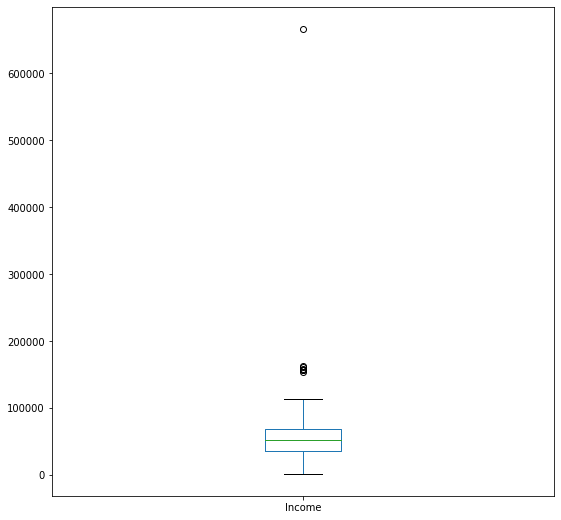

In [ ]:
mark_camp['Income'].plot(kind="box", figsize=(9,9))

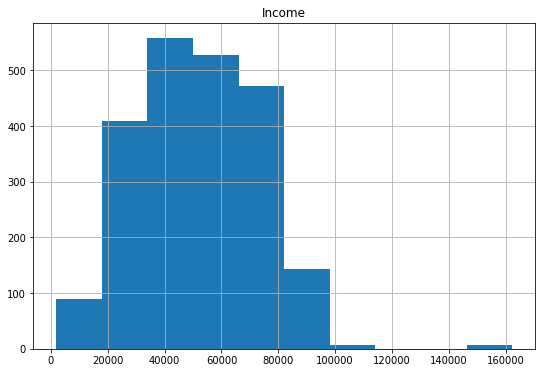

In [ ]:
mark_camp.query("Income < 200000").hist(column='Income',figsize=(9,6))
plt.show()

Plotando o histograma dos dados da coluna *Income* sem considerar um outlier, podemos ver que os dados estão bem distribuidos próximo da mediana. Então, vamos substituir os valores omissos pela mediana.


Análise do novo atributo Income:
count      2240.00
mean      52237.98
std       25037.96
min        1730.00
25%       35538.75
50%       51381.50
75%       68289.75
max      666666.00
Name: Income, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6c39a2e390>]],
      dtype=object)

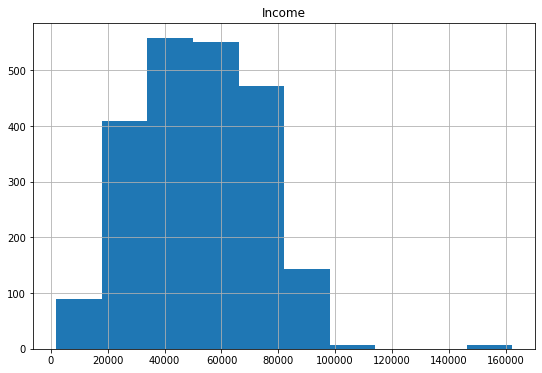

In [ ]:
mediana = np.median([el for el in mark_camp["Income"] if (np.isnan(el) == False)])

new_income = np.where(mark_camp["Income"].isnull(),mediana,mark_camp["Income"])
mark_camp["Income"] = new_income

print("\nAnálise do novo atributo Income:")
print(mark_camp["Income"].describe())

mark_camp.query("Income < 200000").hist(column='Income',figsize=(9,6))


## CRIANDO NOVOS ATRIBUTOS

### Criando NumAcceptedCmp
Vamos criar um campo que corresponde a quantidade de campanhas que o cliente aceitou

In [ ]:
mark_camp['NumAcceptedCmp'] = mark_camp[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']].sum(axis=1)

mark_camp['NumAcceptedCmp'].describe()

count    2240.00
mean        0.45
std         0.89
min         0.00
25%         0.00
50%         0.00
75%         1.00
max         5.00
Name: NumAcceptedCmp, dtype: float64

### Criando AcceptedAnyCmp

Vamos criar um campo que corresponde se o cliente aceitou alguma campanha.

In [ ]:
mark_camp['AcceptedAnyCmp'] = np.where(mark_camp['NumAcceptedCmp']>0,1,0)

mark_camp['AcceptedAnyCmp'].describe()

count    2240.00
mean        0.27
std         0.45
min         0.00
25%         0.00
50%         0.00
75%         1.00
max         1.00
Name: AcceptedAnyCmp, dtype: float64

## DETECTANDO OUTLIERS

O boxplot mostra um valor muito acima dos valores de dispersão. Abaixo, observa-se a nova distribuição dos dados sem os outliers identificados.

In [ ]:
# Método de Tukey
def tukeys_method(df, variable):
    # Recebe dois parâmetros: dataframe & variável de interesse como string
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3-q1
    inner_fence = 1.5*iqr
    outer_fence = 3*iqr
    
    # limites internos
    inner_fence_le = q1-inner_fence
    inner_fence_ue = q3+inner_fence
    
    # limites externos
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    
    outliers_prob = []
    outliers_poss = []
    for index, x in enumerate(df[variable]):
        if x <= outer_fence_le or x >= outer_fence_ue:
            outliers_prob.append(index)
    for index, x in enumerate(df[variable]):
        if x <= inner_fence_le or x >= inner_fence_ue:
            outliers_poss.append(index)
    return outliers_prob, outliers_poss
        
probable_outliers_tm, possible_outliers_tm = tukeys_method(mark_camp, "Income")
print(probable_outliers_tm)
print(possible_outliers_tm)

[2233]
[164, 617, 655, 687, 1300, 1653, 2132, 2233]


In [ ]:
mark_camp = mark_camp.drop([mark_camp.index[164], mark_camp.index[617],mark_camp.index[655],mark_camp.index[687],mark_camp.index[1300],mark_camp.index[1653],mark_camp.index[2132],mark_camp.index[2233]])

In [ ]:
print("\nDimensões da base de dados:\n{0}\n".format(mark_camp.shape))


Dimensões da base de dados:
(2232, 28)



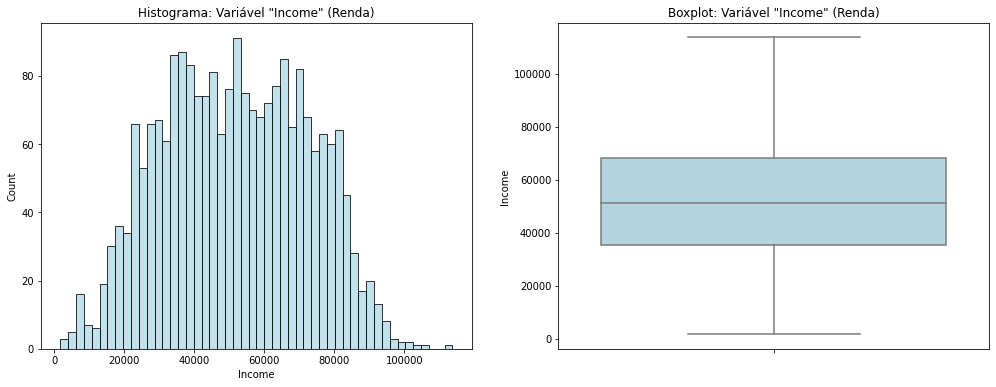

In [ ]:
fig= plt.figure(figsize=(17,6))

ax=fig.add_subplot(121)
sns.histplot(mark_camp.Income, bins=50, color = "lightblue", ax=ax);
ax.set_title('Histograma: Variável "Income" (Renda)');

ax=fig.add_subplot(122)
sns.boxplot(y=mark_camp.Income, color = "lightblue", ax=ax);
ax.set_title('Boxplot: Variável "Income" (Renda)');

###Tabela de Correlação

As variáveis MntWines, MntMeatProducts e MntGoldProducts são aquelas que apresentaram maior correlação positiva com a variável Income (forte correlação).

A variável target "Response" apresentou as maiores correlações positivas com as variáveis que indicam a aceitação das campanhas de Marketing.

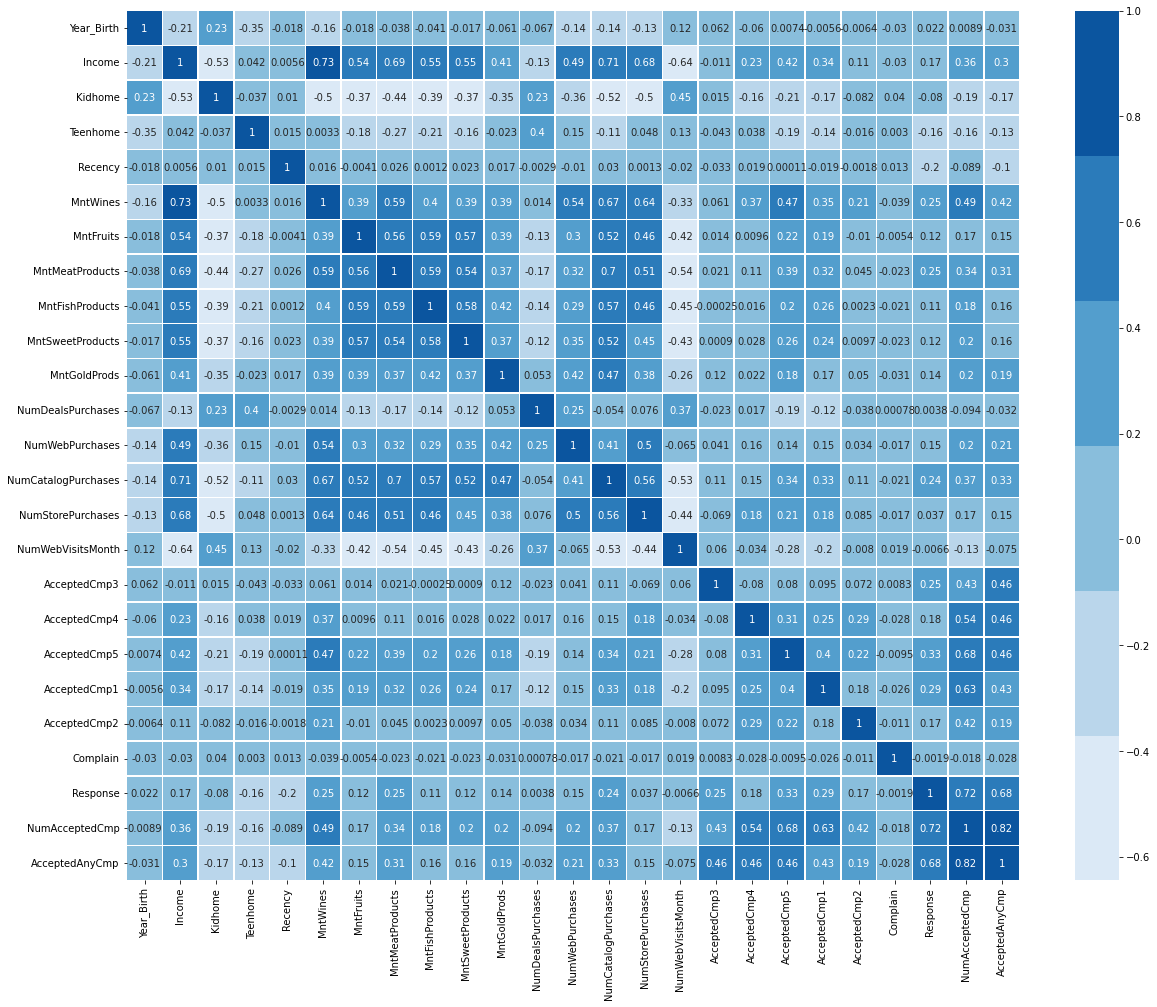

In [ ]:
#Vamos ver a correlação graficamente
#Tabela de correlação
corr = mark_camp.corr()
corr
f, ax = plt.subplots(figsize=(20, 16))
sns.heatmap(corr, cmap=sns.color_palette("Blues"), linewidths=.5, annot=True);

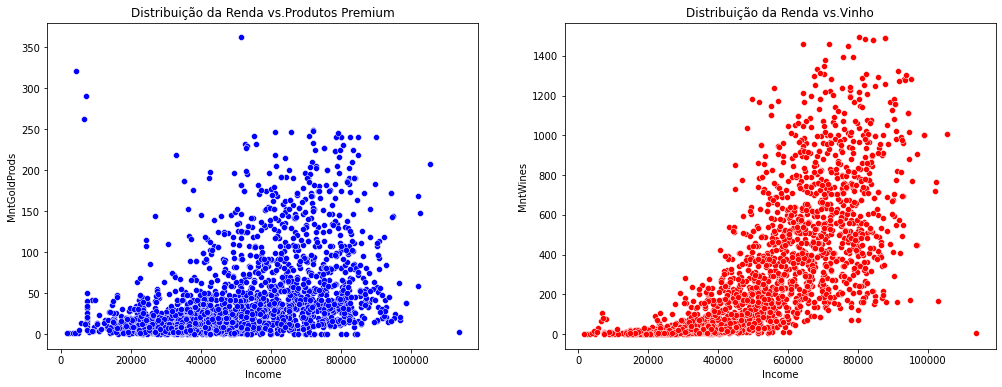

In [ ]:

fig= plt.figure(figsize=(17,6))

ax=fig.add_subplot(121)
sns.scatterplot(x = mark_camp["Income"], y=mark_camp["MntGoldProds"],color='b',ax=ax)
ax.set_title('Distribuição da Renda vs.Produtos Premium');

ax=fig.add_subplot(122)
sns.scatterplot(x=mark_camp["Income"], y=mark_camp["MntWines"], color='r',ax=ax)
ax.set_title('Distribuição da Renda vs.Vinho');

## PREPARANDO A BASE PARA O TREINAMENTO

 Primeiramente foi feita a separação das datas por dia, mês e ano.

In [ ]:
mark_camp['Dt_Customer'] = mark_camp['Dt_Customer'].astype('datetime64')
mark_camp['Date_Customer'] = mark_camp['Dt_Customer'].dt.day
mark_camp['Month_Customer'] = mark_camp['Dt_Customer'].dt.month
mark_camp['Year_Customer'] = mark_camp['Dt_Customer'].dt.year

In [ ]:
print(mark_camp.columns)

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'NumAcceptedCmp',
       'AcceptedAnyCmp', 'Date_Customer', 'Month_Customer', 'Year_Customer'],
      dtype='object')


 Para facilitar a separação do target as colunas foram reordenadas para que as novas datas, agora divididas, voltem para o lugar da data anterior, e os possíveis targets continuem ao fim da tabela.

In [ ]:
mark_camp = mark_camp[['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Date_Customer', 'Month_Customer', 'Year_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'NumAcceptedCmp',
       'AcceptedAnyCmp']]

In [ ]:
mark_camp.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Date_Customer,Month_Customer,Year_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,NumAcceptedCmp,AcceptedAnyCmp
0,1957,Graduation,Single,58138.0,0,0,4,9,2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1,1
1,1954,Graduation,Single,46344.0,1,1,8,3,2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,0,0
2,1965,Graduation,Married,71613.0,0,0,21,8,2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,0,0
3,1984,Graduation,Married,26646.0,1,0,10,2,2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,19,1,2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,0,0


 As colunas categóricas da tabela foram passadas para numéricas utilizando o label encoder, e a divisão do X e do y foi feita de maneira a separar os parâmetros dos possíveis targets. Como nessa tabela temos cinco diferentes campanhas, uma coluna de reclamações, uma referente a última campanha, uma com a somatória de todas e outra coluna com uma generalização de aceitação para qualquer uma das campanhas, foi utilizado a posição da -9 no iloc para tirar todos os possíveis targets.
 
 Para os testes a seguir a coluna de aceitação de qualquer uma das campanhas será utilizada como target.

In [ ]:
le = LabelEncoder()
for c in mark_camp.columns:
  if(mark_camp[c].dtype == 'object'):
    mark_camp[c] = le.fit_transform(mark_camp[c])

X = (mark_camp.iloc[:,0:-9])

y = le.fit_transform(mark_camp.iloc[:,(mark_camp.shape[1] - 1)])
class_names = le.classes_

# Particiona a base de dados
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.1)

## TREINAMENTO 1

Como primeiro modelo foi utilizado um método de Adaptativ Boosting (AdaBoostClassifier), por apresentar no geral um bom resultado ao mesclar classificadores fracos com classificadores fortes, e, por essa base apresentar uma diversidade de parâmetros que se encaixam em situações específicas, o Adaboost seria recomendado.
 
No modelo das árvores criadas para o processo do Boosting o limite máximo da árvore foi definido para 3, de maneira que fosse um modelo não muito forte mas que tivesse regras úteis. Também foi utilizado a função de max_features com o valor de *log2* para que houvesse uma variabilidade de parâmetros, visto que isso limitaria a quantidade de parâmetros que cada árvore poderia utilizar.

In [ ]:
ada = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=3, max_features='log2'), 
                         algorithm="SAMME", n_estimators=75, random_state=0)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
print("Classificador AdaBoost:\n AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=3), algorithm=\"SAMME\", n_estimators=50)\n")
print("--------------------------------------")
print("Acurácia da base de treinamento: {:.2f}".format(ada.score(X_train, y_train)))
print("Acurácia de previsão: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("--------------------------------------")

classes = ['Recusou', 'Aceitou']

print(classification_report(y_test, y_pred, target_names=classes))

cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix, index=classes, columns=[x + "(prev)" for x in classes])
cnf_table

Classificador AdaBoost:
 AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=3), algorithm="SAMME", n_estimators=50)

--------------------------------------
Acurácia da base de treinamento: 0.88
Acurácia de previsão: 0.87
--------------------------------------
              precision    recall  f1-score   support

     Recusou       0.88      0.95      0.91       167
     Aceitou       0.80      0.63      0.71        57

    accuracy                           0.87       224
   macro avg       0.84      0.79      0.81       224
weighted avg       0.86      0.87      0.86       224



,Recusou(prev),Aceitou(prev)
Recusou,158,9
Aceitou,21,36


## TREINAMENTO 2

No segundo modelo usamos a Regressão Logística (LogisticRegression)

Este modelo foi utilizado pois a base apresenta muitas variáveis categóricas que não seriam bem classificadas com a Regressão Linear.

In [ ]:
lr = LogisticRegression(random_state=0, max_iter=10000).fit(X_train, y_train)

y_pred = lr.predict(X_test)
print("Logistic Regression:\n LogisticRegression(random_state=0, max_iter=10000)\n")
print("--------------------------------------")
print("Acurácia da base de treinamento: {:.2f}".format(ada.score(X_train, y_train)))
print("Acurácia de previsão: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("--------------------------------------")

print(classification_report(y_test, y_pred, target_names=classes))

cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix, index=classes, columns=[x + "(prev)" for x in classes])
cnf_table


Logistic Regression:
 LogisticRegression(random_state=0, max_iter=10000)

--------------------------------------
Acurácia da base de treinamento: 0.88
Acurácia de previsão: 0.82
--------------------------------------
              precision    recall  f1-score   support

     Recusou       0.84      0.94      0.88       167
     Aceitou       0.72      0.46      0.56        57

    accuracy                           0.82       224
   macro avg       0.78      0.70      0.72       224
weighted avg       0.81      0.82      0.80       224



,Recusou(prev),Aceitou(prev)
Recusou,157,10
Aceitou,31,26


## TREINAMENTO 3

No terceiro modelo usamos uma Rede Neural (MLPClassifier). Esse modelo foi escolhido pois as RNA são métodos de Deep Learning com capacidade de reconhecimento de padrões complexos ou numerosos e com função de aprendizado dentro da própria rede.

O melhor resultado obtido foi com 300 neurônios em 3 camadas iguais (100, 100 e 100) e solver 'lbfgs'. Mesmo assim, ainda ocorreu um overfitting considerável em comparação com os outros dois modelos.

In [ ]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[100, 100, 100], learning_rate_init=0.01, max_iter=200000)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

print("Classificador MLPClassifier:\n MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[100, 100, 100], learning_rate_init=0.01, max_iter=200000)\n")
print("--------------------------------------")
print("Acurácia da base de treinamento: {:.2f}".format(ada.score(X_train, y_train)))
print("Acurácia de previsão: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("--------------------------------------")

print(classification_report(y_test, y_pred, target_names=classes))

# Calcula a matriz de confusão
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix, index=classes, columns=[x + "(prev)" for x in classes])
cnf_table

Classificador MLPClassifier:
 MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[100, 100, 100], learning_rate_init=0.01, max_iter=200000)

--------------------------------------
Acurácia da base de treinamento: 0.88
Acurácia de previsão: 0.82
--------------------------------------
              precision    recall  f1-score   support

     Recusou       0.84      0.94      0.89       167
     Aceitou       0.73      0.47      0.57        57

    accuracy                           0.82       224
   macro avg       0.78      0.71      0.73       224
weighted avg       0.81      0.82      0.81       224



,Recusou(prev),Aceitou(prev)
Recusou,157,10
Aceitou,30,27


## ÁNALISE DOS RESULTADOS ALCANÇADOS

Todos os três modelos apresentaram valores para a precisão e a revocação da classe "Aceitou" piores do que para a classe "Recusou", sendo que a melhor performance ocorreu no modelo 1 - AdaBoost, com f-1 score de 0.91 e 0.71, respectivamente. O modelo 2 - Regressão Logística - apresentou f-1 score de 0.88 e 0.56, enquanto o modelo 3 - Rede Neural com 3 camadas - obteve f1-score de 0.89 e 0.57.

De acordo com os resultados, os dados de previsão não se mostraram satisfatórios nos modelos AdaBoost e de Redes Neurais para os casos em que a campanha de marketing foi aceita. Em termos práticos, estes modelos não são úteis para se prever se uma campanha será bem-sucedida. Em relação à classe “recusou”, a precisão e a revocação apresentaram resultados interessantes e pode ser útil para redirecionar as campanhas de marketing.

In [ ]:
!jupyter nbconvert --to PDF "/content/drive/MyDrive/Colab\ Notebooks/machine_learning/Trabalho\ Final/Trabalho_Orientado_Machine_Learning.ipynb"

[NbConvertApp] WARNING | pattern u'/content/drive/MyDrive/Colab\\ Notebooks/machine_learning/Trabalho\\ Final/Trabalho_Orientado_Machine_Learning.ipynb' matched no files
This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
-------

Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.

--execute
    Execute the notebook prior to export.
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.
--no-input
    Exclude input cells and output prompts from converted document. 
    This mode is ideal for generating code-free reports.
--stdout
    Write notebook output to stdout instead of files.
--stdin
    read a single notebook f

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
